In [1]:
import cv2 as cv
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv_imshow
drive.mount('/content/drive')

Mounted at /content/drive


# 彩色/灰階影像的直方圖繪製

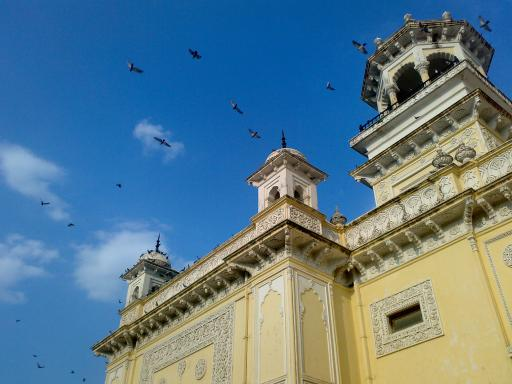

In [2]:
folder = r'/content/drive/MyDrive/images'
path_img = os.path.join(folder,'home.jpg')

img = cv.imread(path_img)
if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

## Calculate it

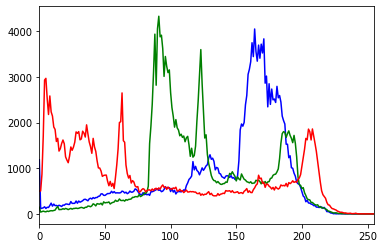

In [3]:
color = ('b','g','r')
for i, col in enumerate(color):
  hist = cv.calcHist([img],[i],None,[256],[0,255])
  plt.plot(hist,color=col)
  plt.xlim([0,255])
plt.show()

## Calculate it in gray-scale image


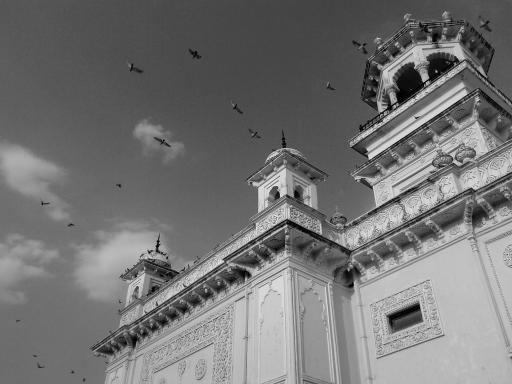

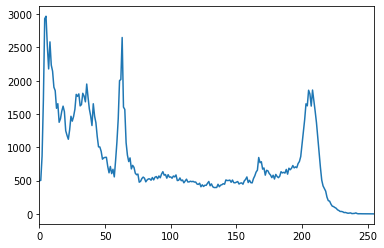

In [4]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv_imshow(img_gray)
hist = cv.calcHist([img],[i],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])
plt.show()

# 影像的直方圖均等化


In [5]:
folder = r'/content/drive/MyDrive/images'
path_img = os.path.join(folder,'Hawkes_Bay_NZ.jpg')

img = cv.imread(path_img)
if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

Output hidden; open in https://colab.research.google.com to view.

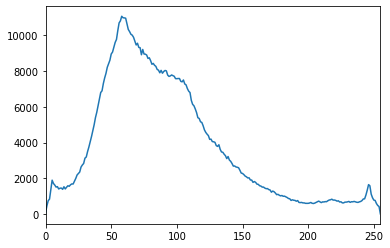

In [6]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

hist = cv.calcHist([img_gray],[0],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])
plt.show()

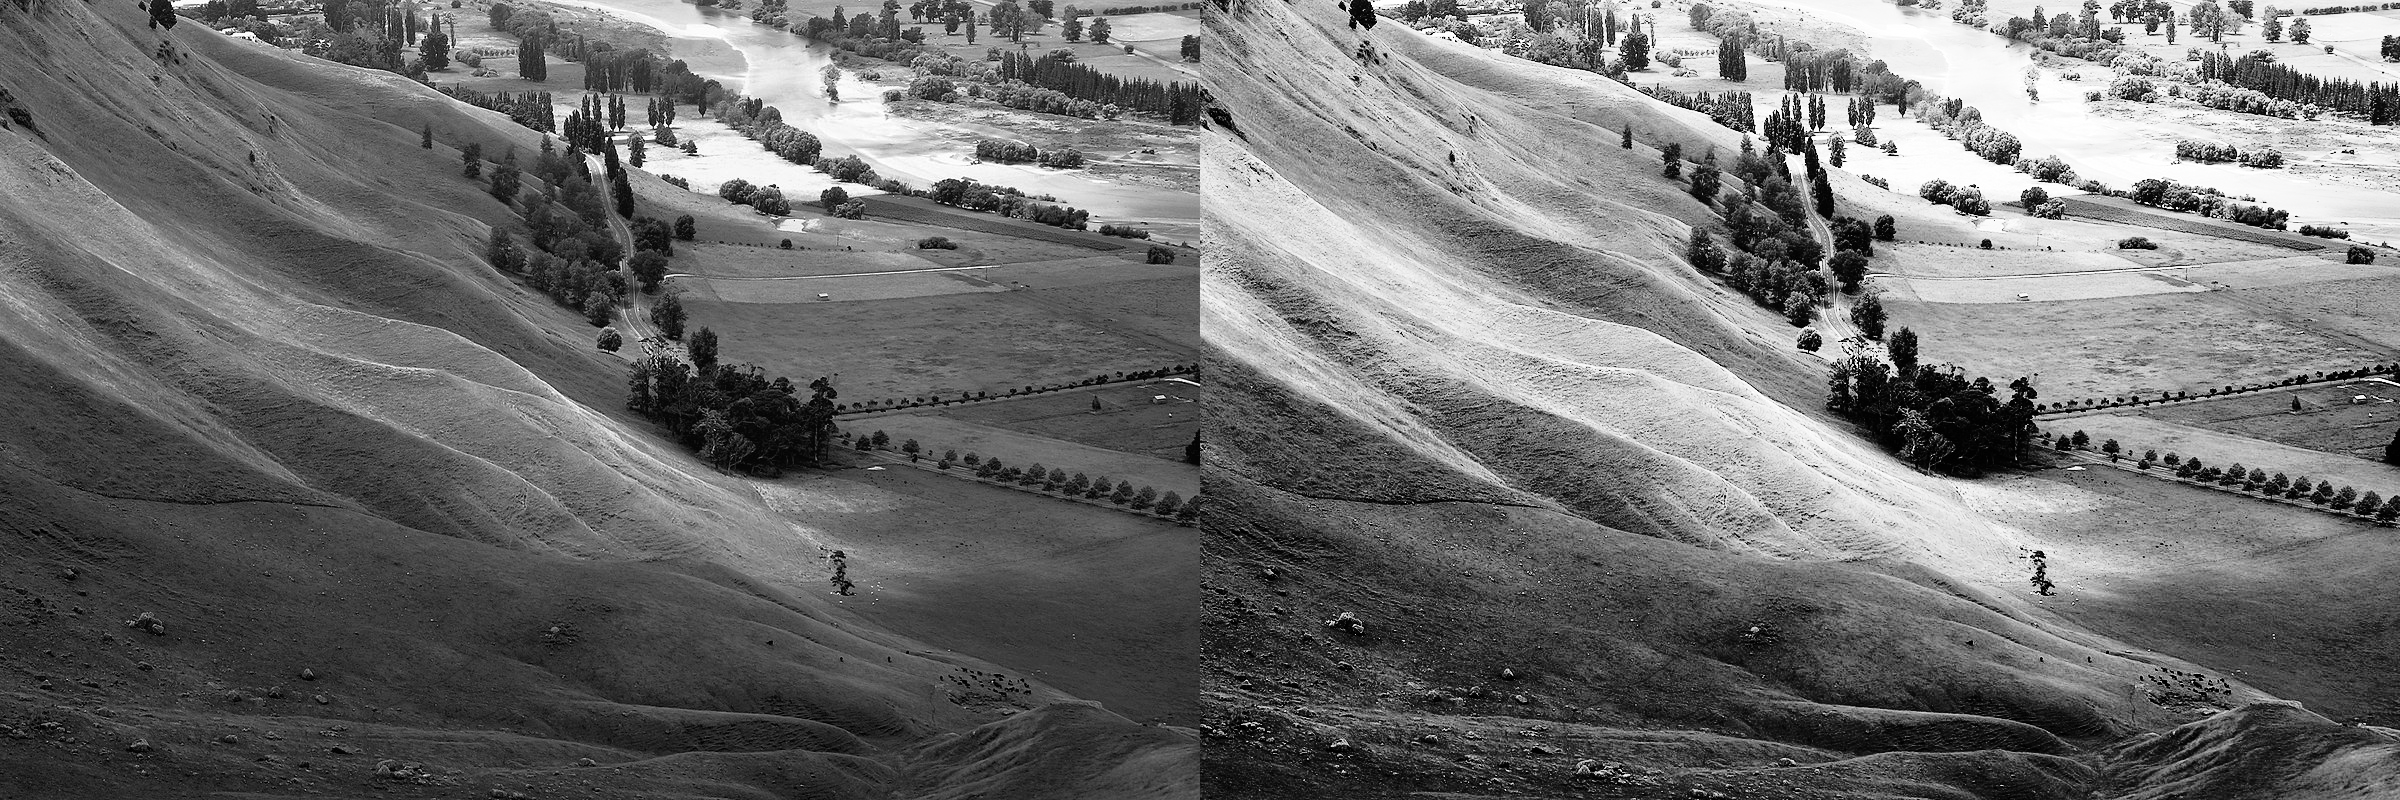

In [7]:
equ = cv.equalizeHist(img_gray)
res = np.hstack((img_gray,equ))
cv_imshow(res)

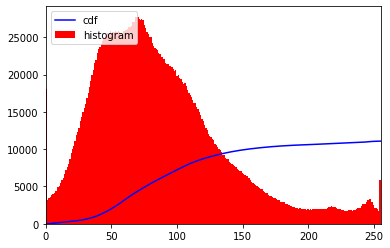

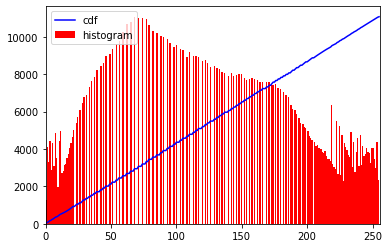

In [9]:
hist,bins = np.histogram(img_gray.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized,color = 'b')
plt.hist(img.flatten(),256,[0,255],color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.show()

hist,bins = np.histogram(equ.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,255],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.show()